# 線性迴歸

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 讀取資料

In [3]:
customers = pd.read_csv('Ecommerce Customers')
customers

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
sns.set_palette("GnBu_d")

In [7]:
sns.set_style('whitegrid')

## 查看資料

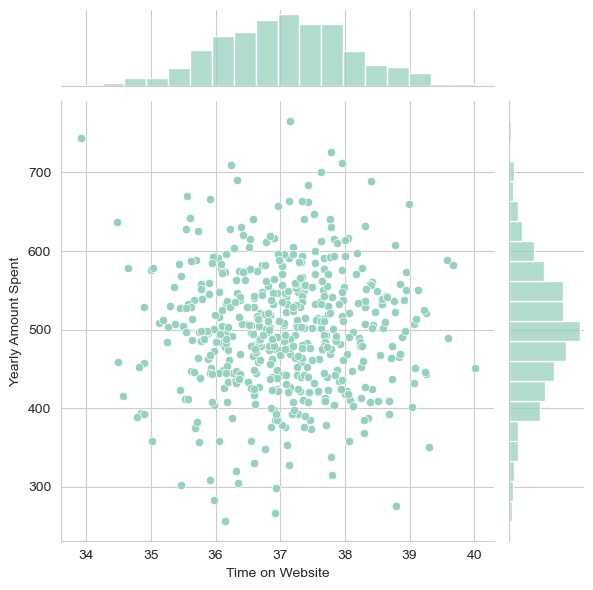

In [8]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

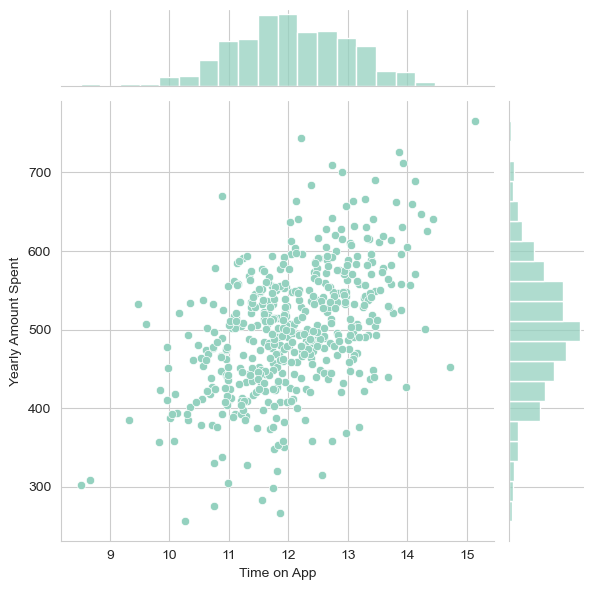

In [9]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

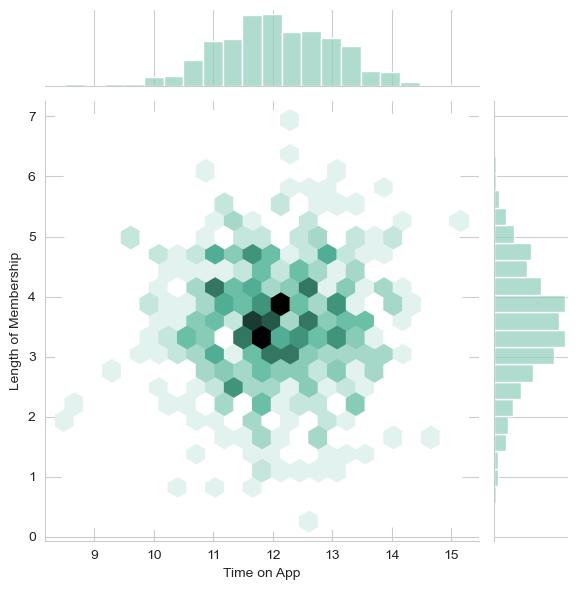

In [10]:
sns.jointplot(x='Time on App',y='Length of Membership',kind="hex",data=customers)

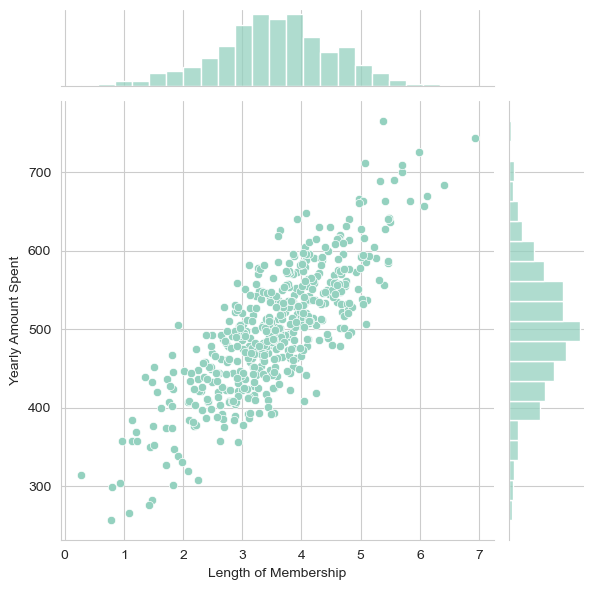

In [11]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

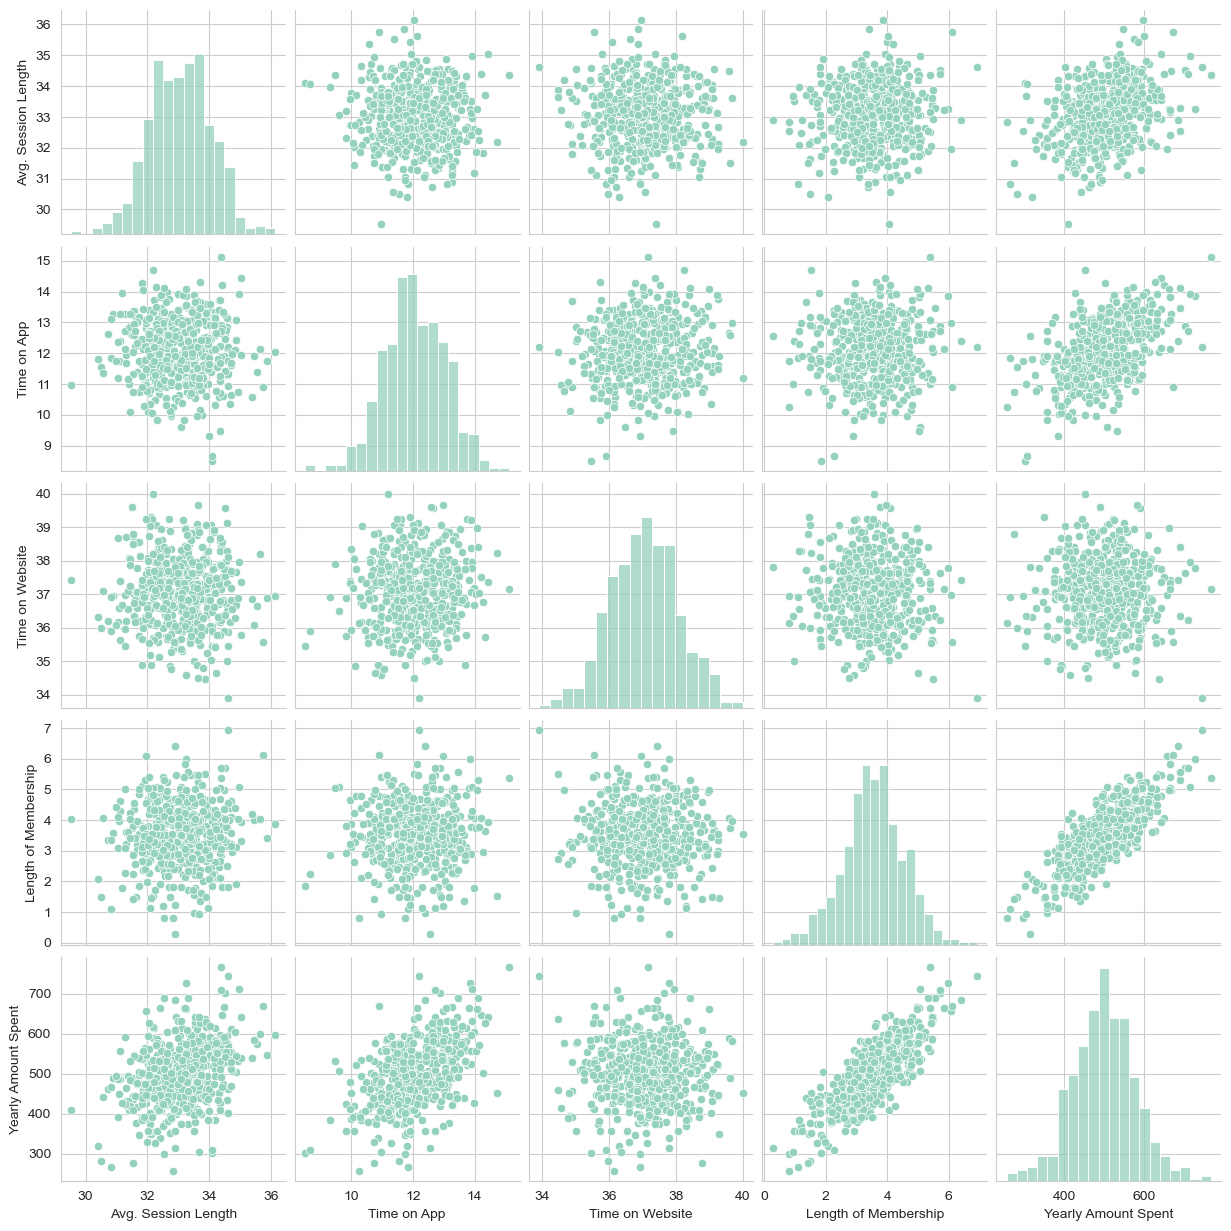

In [12]:
sns.pairplot(customers)

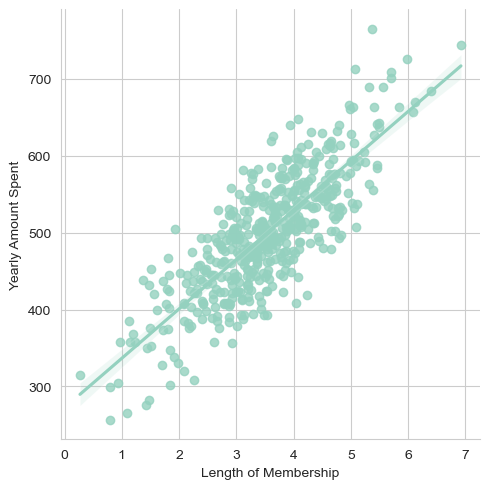

In [13]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)     # linear model plot

## 切分數據

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [16]:
y = customers['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(350, 4) (150, 4) (350,) (150,)


## 訓練模型

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [21]:
predictions = lm.predict(X_test)
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

Text(0, 0.5, 'Predicted Y')

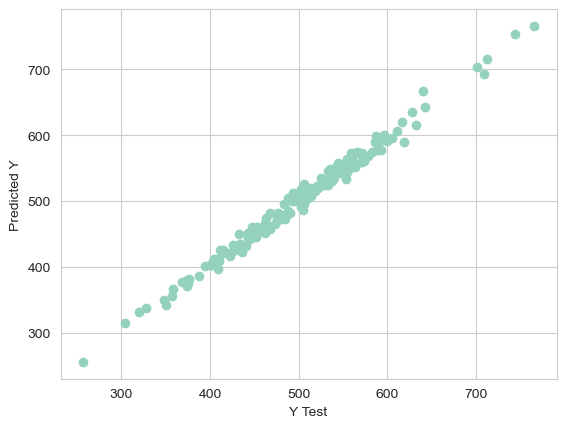

In [22]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

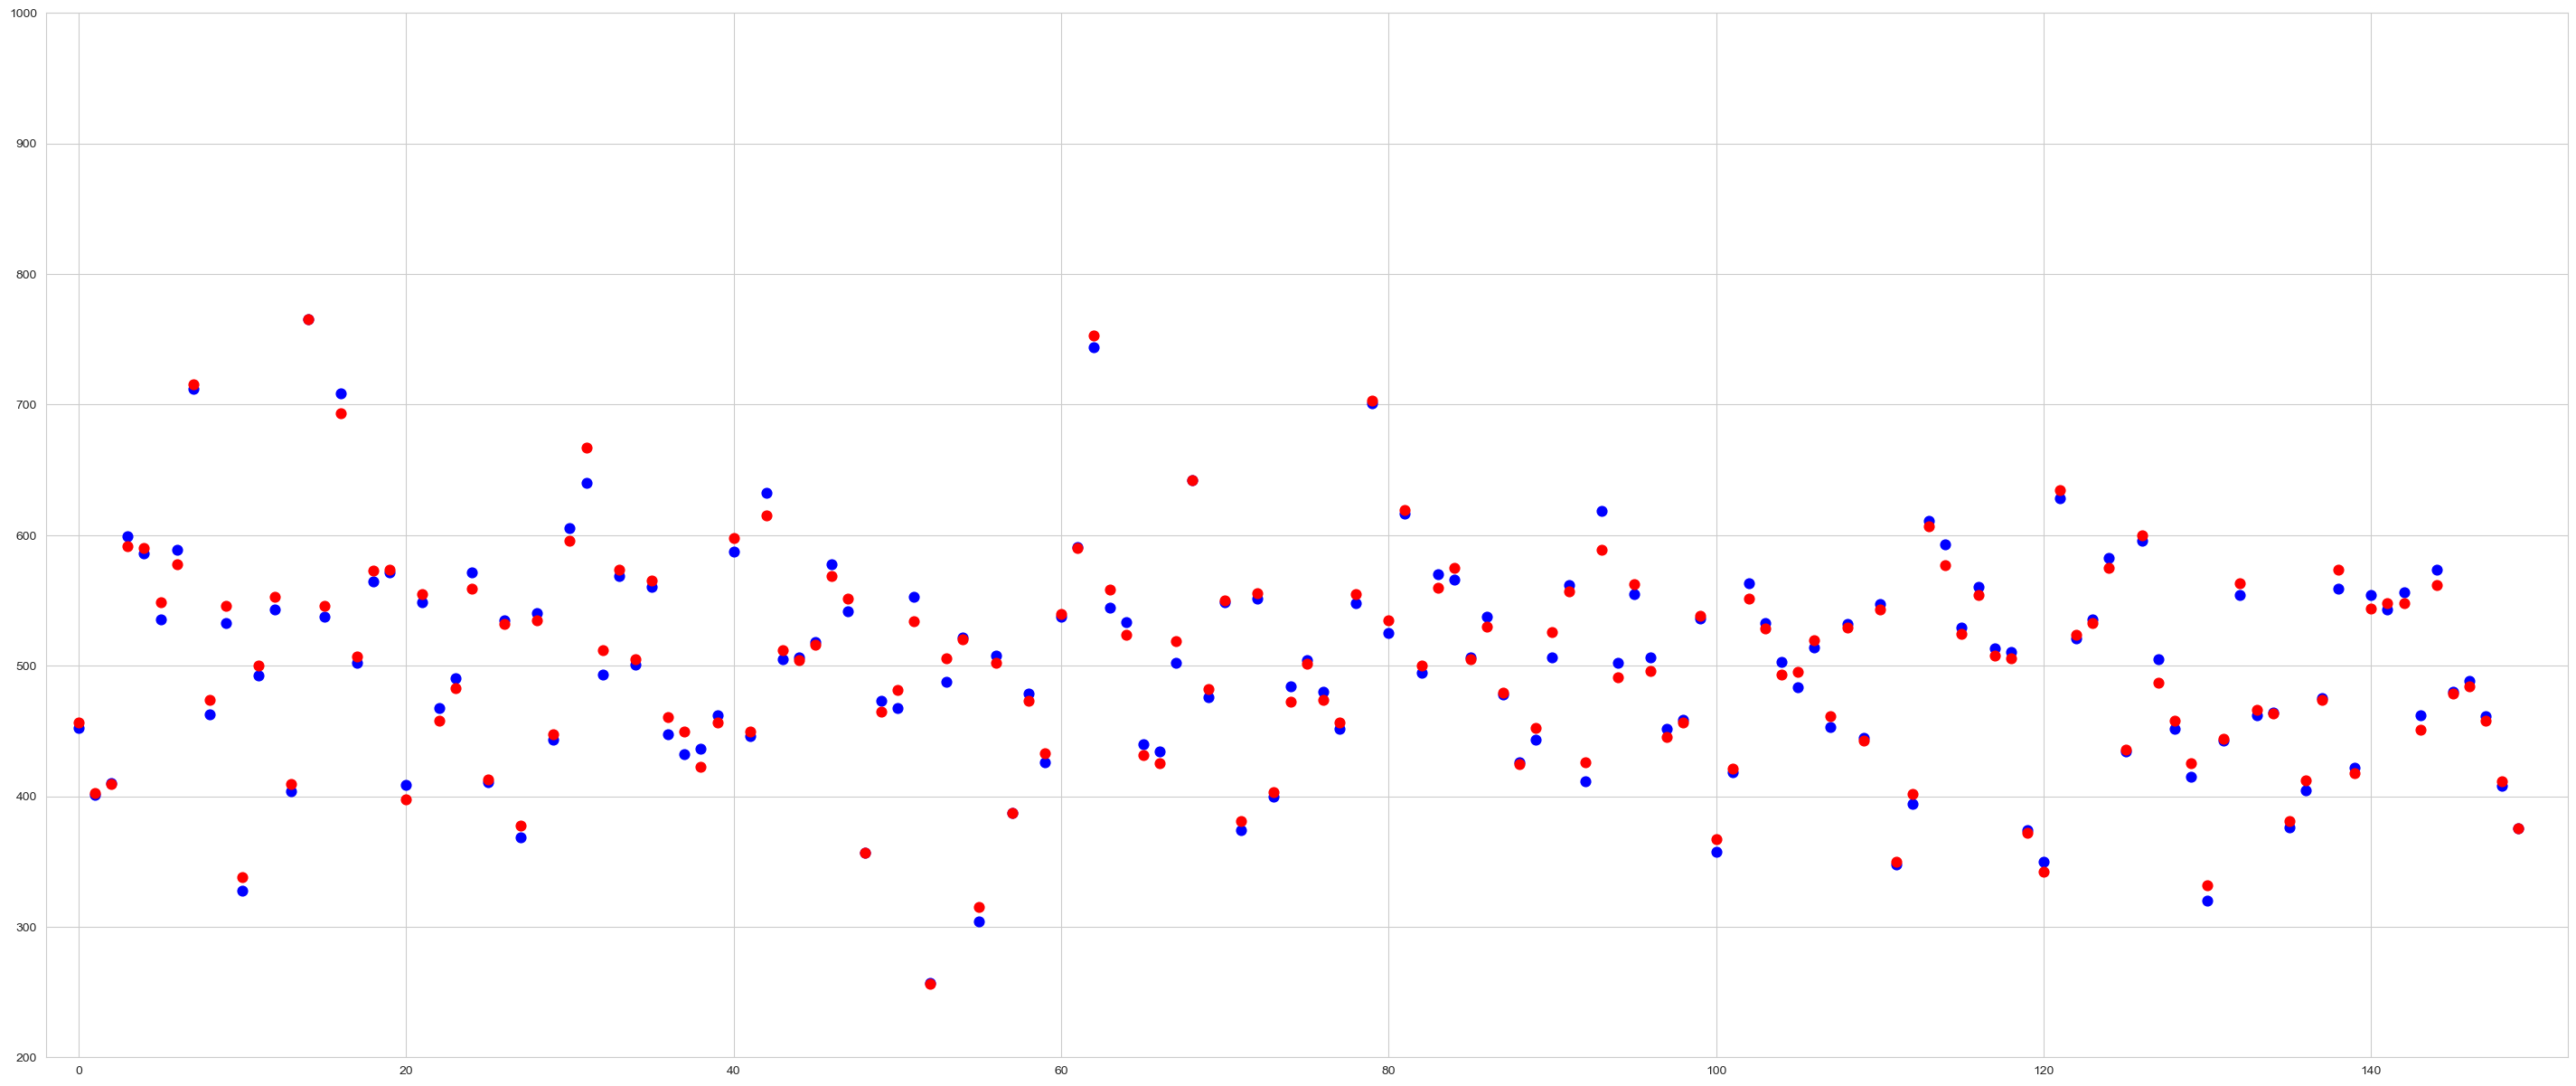

In [23]:
plt.figure(figsize=(36, 15))#6，8分别对应宽和高
plt.scatter(range(0,150,1),y_test,c='b',s=60)   # 設定透明度為 0.5
plt.scatter(range(0,150,1),predictions,c='r',s=60)   # 設定透明度為 0.5
plt.xlim(-2,152)
plt.ylim(200,1000)
plt.show()

(-1.0, 40.0)

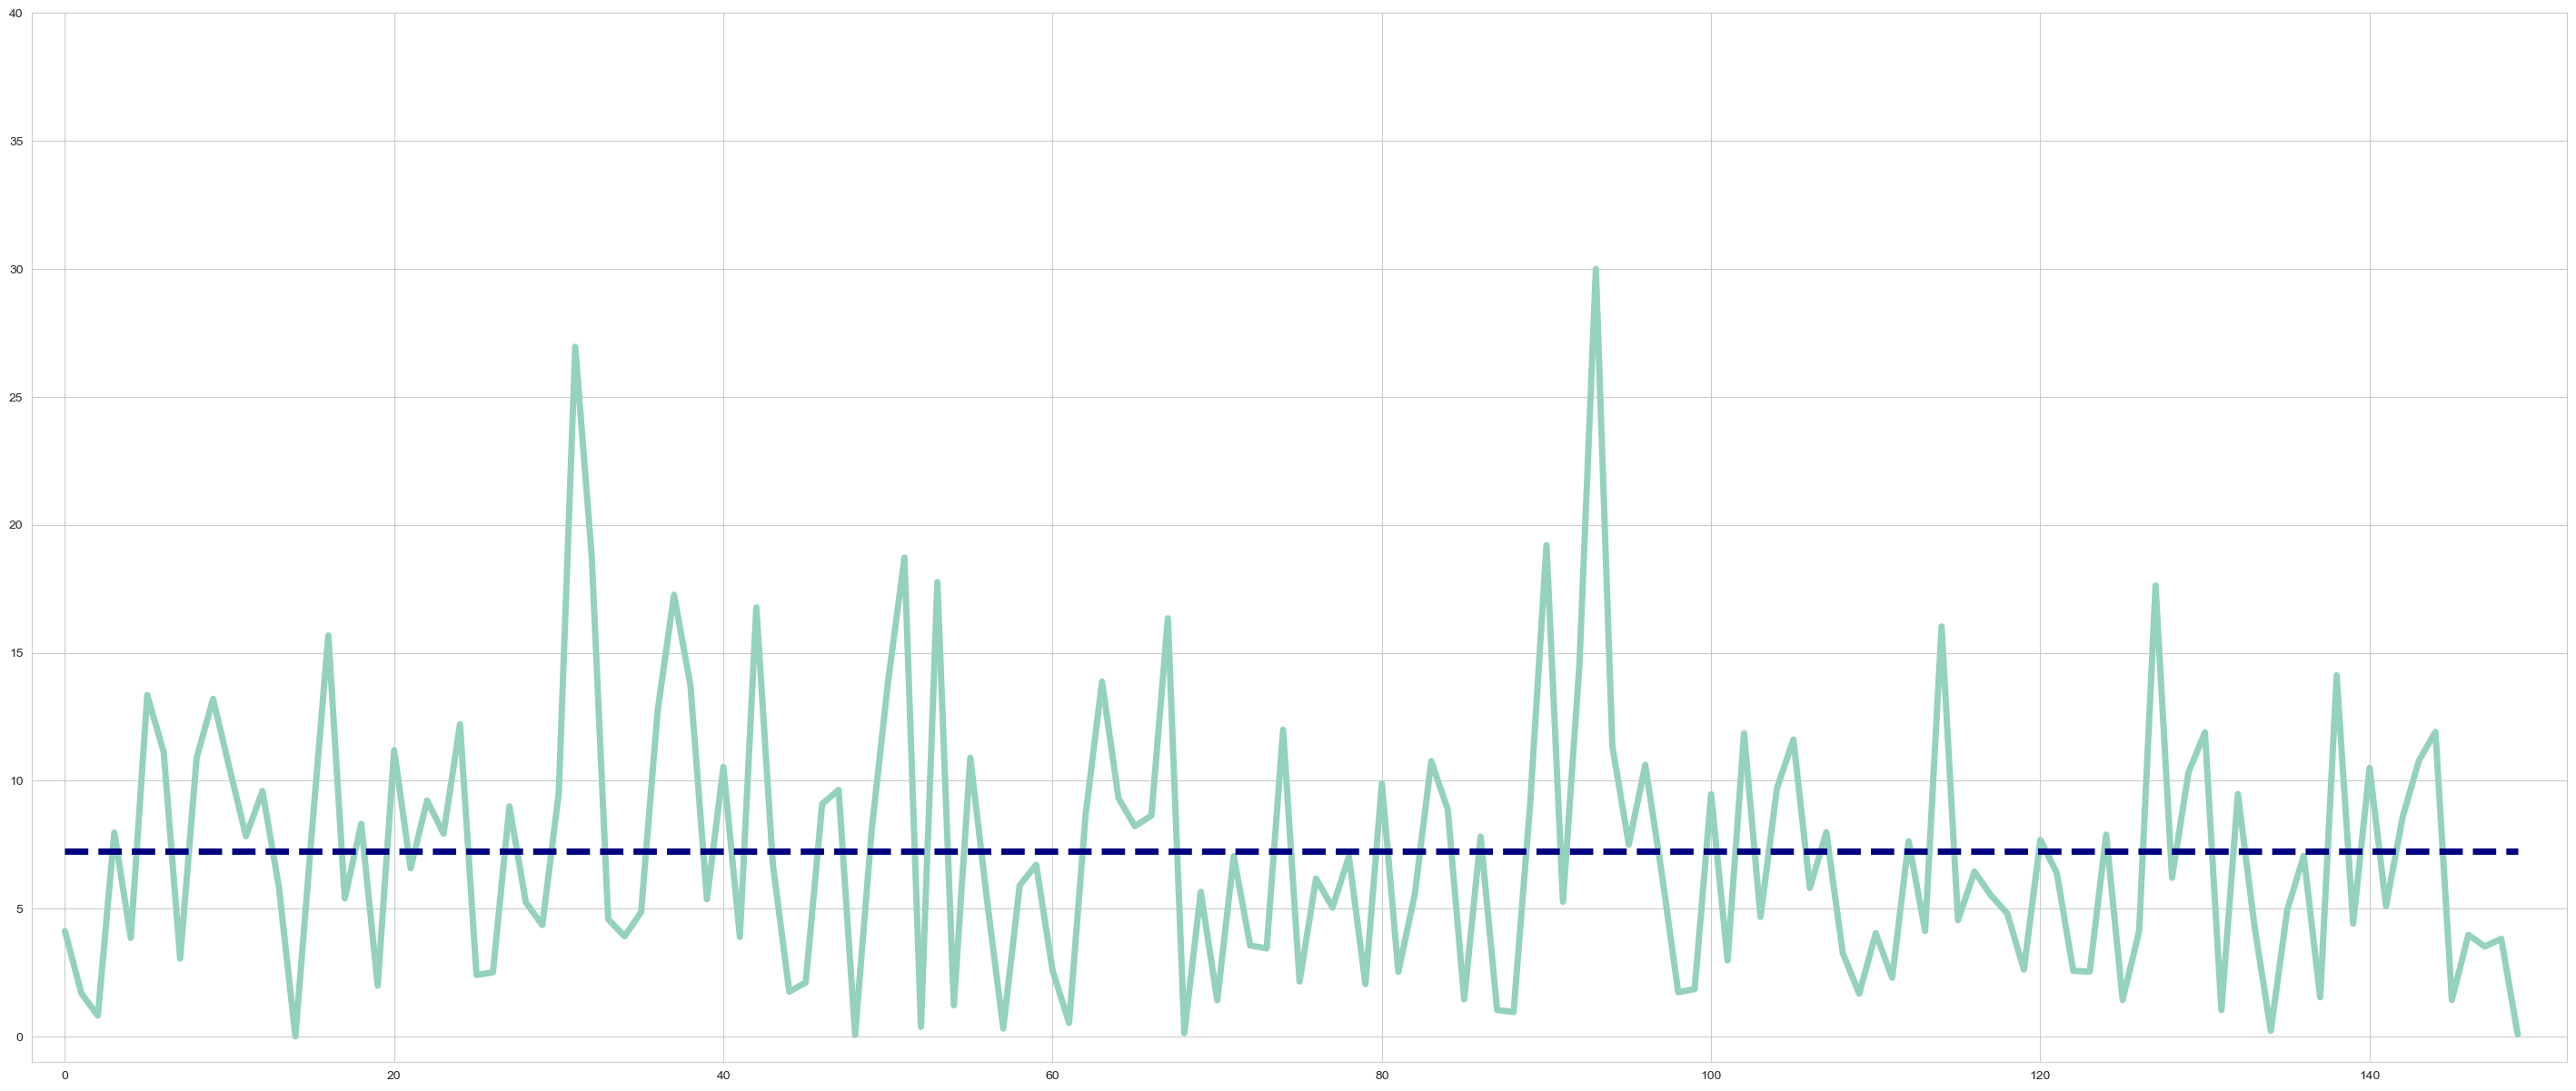

In [24]:
plt.figure(figsize=(36, 15))#6，8分别对应宽和高
plt.plot(range(0,150,1),abs(predictions - y_test),linewidth=5.0)
plt.plot(range(0,150,1),[sum(abs(predictions - y_test))/len(predictions)]*150,linewidth=5.0,c='navy',linestyle='--')
plt.xlim(-2,152)
plt.ylim(-1,40)

## 評估模型

In [25]:
from sklearn import metrics

In [26]:
metrics.mean_absolute_error(y_test,predictions)

7.228148653430832

In [27]:
metrics.mean_squared_error(y_test,predictions)

79.81305165097456

In [28]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

8.93381506697864

C:\Users\SamuelZovith\AppData\Local\Temp\ipykernel_1864\3462226243.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - predictions,bins=50)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

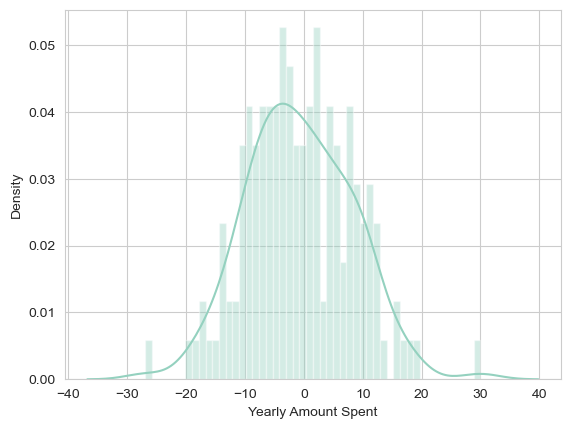

In [29]:
sns.distplot(y_test - predictions,bins=50)

## 線性回歸中每個特徵的參數


In [32]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
